In [1]:
import os
import time
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('data/patient_features_initial.csv')
data2 = pd.read_csv('data/patient_features_final.csv')
data1.head()

,id,race,gender,age,initial_creatinine,initial_eGFR,initial_stage,initial_sbp,initial_dbp,initial_bp_stage,initial_ldl,initial_cholesterol_stage,initial_glucose,initial_diabetes_stage,initial_hgb,cholesterol_drug,diabetes_drug,hbp_lol_drug,hbp_tan_drug,Stage_Progress
0,0,Unknown,Male,70,1.29,55.1,3a,134.11,95.32,Hypertension 1,161.49,High,6.24,Healthy,13.51,0.0,0.0,0.0,0.0,True
1,1,White,Female,71,1.74,28.8,4,157.46,72.49,Hypertension 2,89.57,Optimal,9.96,Diabetes,13.89,0.0,0.0,0.0,0.0,False
2,2,White,Female,57,2.51,19.8,4,132.89,81.13,Hypertension 1,61.62,Optimal,7.24,Diabetes,15.34,0.0,0.0,0.0,0.0,True
3,3,White,Male,74,0.74,103.4,1,147.46,80.09,Hypertension 1,99.71,Optimal,6.43,Healthy,13.74,0.0,0.0,0.0,0.0,False
4,4,White,Female,50,1.34,41.9,3b,128.78,82.23,Hypertension 1,65.73,Optimal,8.76,Diabetes,13.21,1.0,0.0,0.0,0.0,True


### EDA

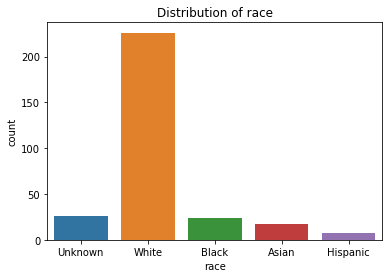

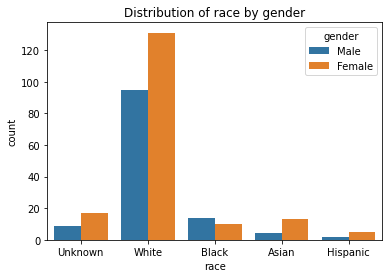

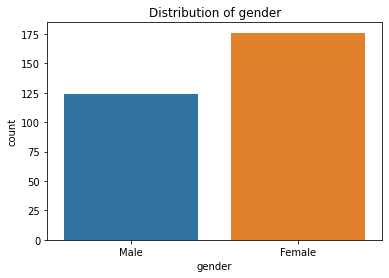

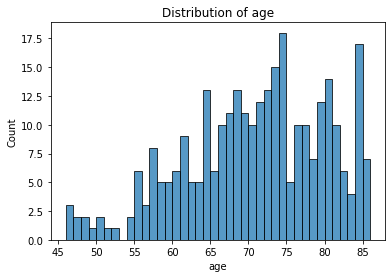

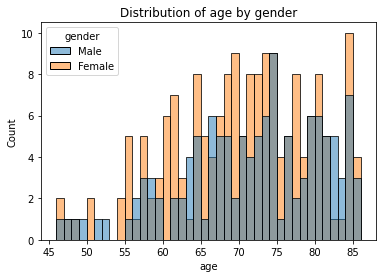

In [3]:
# Demographic profiling
data = data1.copy()

sns.countplot(x='race', data=data)
plt.title('Distribution of race')
plt.show()

sns.countplot(x='race', hue='gender', data=data)
plt.title('Distribution of race by gender')
plt.show()

sns.countplot(x='gender', data=data)
plt.title('Distribution of gender')
plt.show()

sns.histplot(x='age', data=data, bins=40)
plt.title('Distribution of age')
plt.show()

sns.histplot(x='age', data=data, hue='gender', bins=40)
plt.title('Distribution of age by gender')
plt.show()

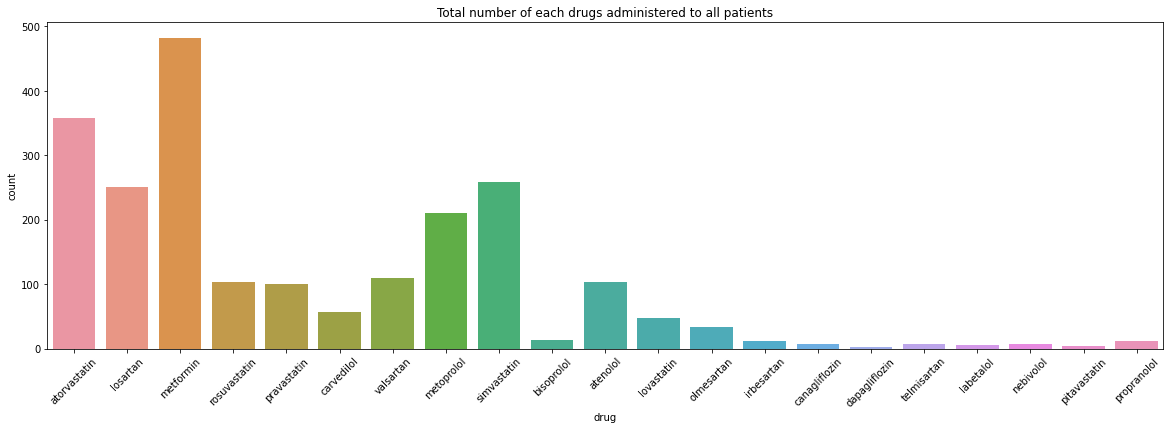

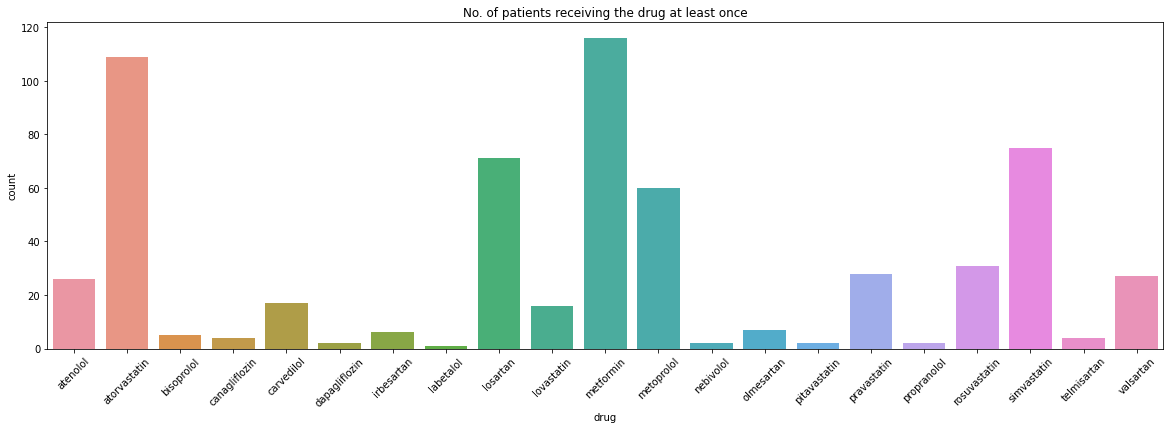

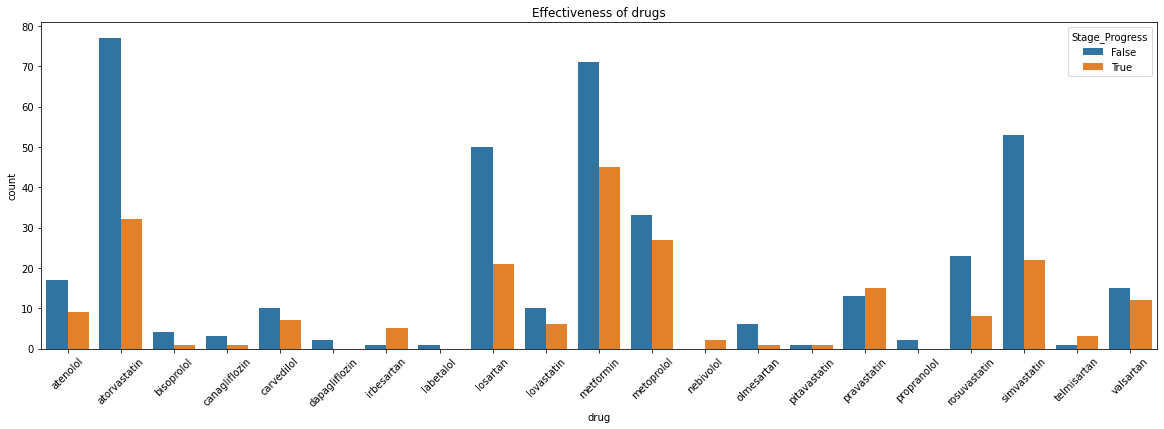

In [4]:
# # Treatment profiling
meds_data = pd.read_csv('data/T_meds.csv')

plt.figure(figsize=(20,6))
sns.countplot(x='drug', data=meds_data)
plt.title('Total number of each drugs administered to all patients')
plt.xticks(rotation=45)
plt.show()

tmp = meds_data.groupby('drug')['id'].nunique().reset_index().rename({'id' : 'count'}, axis=1)
plt.figure(figsize=(20,6))
sns.barplot(x='drug', y='count', data=tmp)
plt.title('No. of patients receiving the drug at least once')
plt.xticks(rotation=45)
plt.show()

tmp_data = data.merge(meds_data, how='inner', on='id')
tmp = tmp_data.groupby(['drug', 'Stage_Progress'])['id'].nunique().reset_index().rename({'id' : 'count'}, axis=1)
plt.figure(figsize=(20,6))
sns.barplot(x='drug', y='count', hue='Stage_Progress', data=tmp)
plt.title('Effectiveness of drugs')
plt.xticks(rotation=45)
plt.show()

In [5]:
### Statins are medications prescribed by a doctor to lower cholesterol in people who have been 
### diagnosed with high cholesterol

### Metformin is used to treat type 2 diabetes

### Losartan is used to treat high blood pressure (hypertension) and to 
### help protect the kidneys from damage due to diabetes

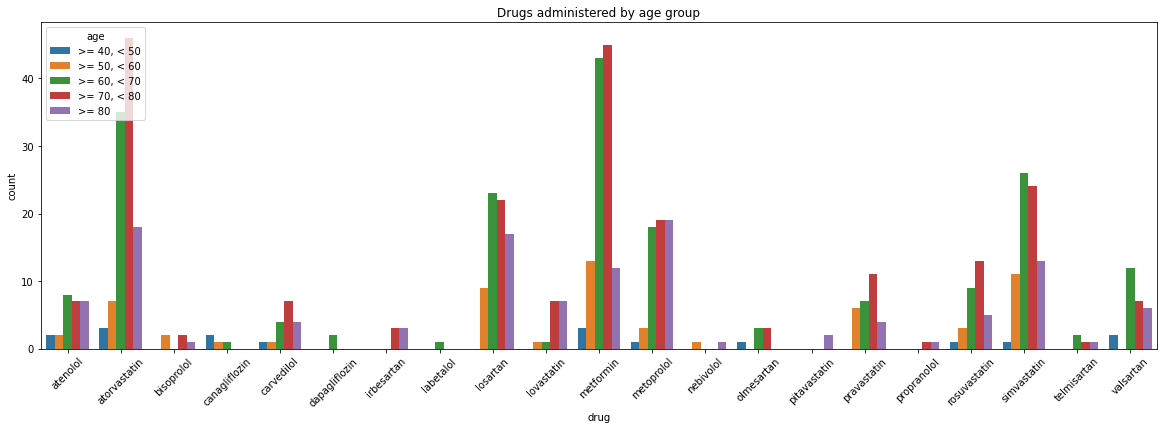

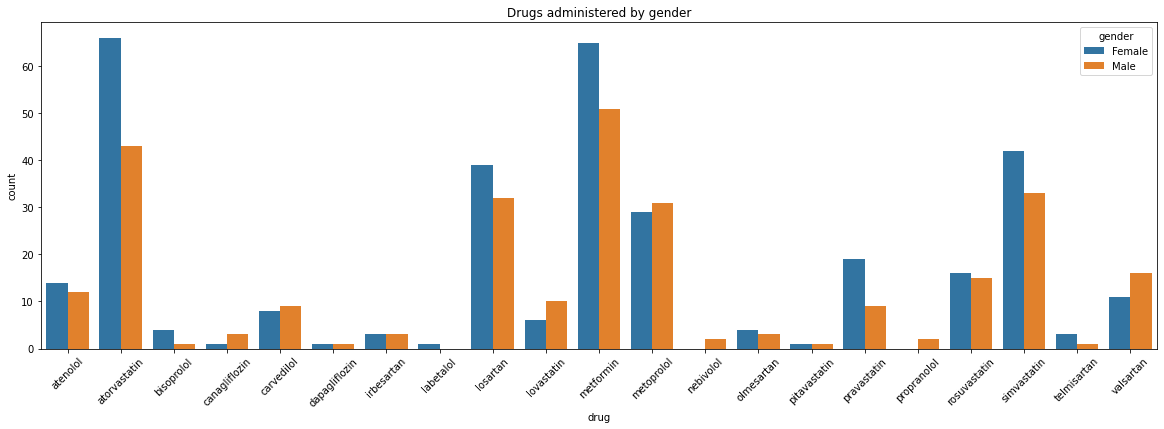

In [6]:
age_map = {i : '>= 40, < 50' if i >= 40 and i < 50
           else '>= 50, < 60' if i >= 50 and i < 60 
           else '>= 60, < 70' if i >= 60 and i < 70
           else '>= 70, < 80' if i >= 70 and i < 80 
           else '>= 80' for i in data['age'].unique()}

binned_data = tmp_data.copy()
binned_data['age'] = binned_data['age'].map(age_map)


plt.figure(figsize=(20,6))
tmp = binned_data.groupby(['drug', 'age'])['id'].nunique().reset_index().rename({'id' : 'count'}, axis=1)
sns.barplot(x='drug', y='count', hue='age', data=tmp)
plt.title('Drugs administered by age group')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,6))
tmp = binned_data.groupby(['drug', 'gender'])['id'].nunique().reset_index().rename({'id' : 'count'}, axis=1)
sns.barplot(x='drug', y='count', hue='gender', data=tmp)
plt.title('Drugs administered by gender')
plt.xticks(rotation=45)
plt.show()

In [7]:
data['initial_stage'].value_counts()

3b    111
3a     79
2      65
4      28
1      17
Name: initial_stage, dtype: int64

In [8]:
data['initial_diabetes_stage'].value_counts()

Healthy     196
Diabetes    104
Name: initial_diabetes_stage, dtype: int64

In [9]:
data['initial_bp_stage'].value_counts()

Hypertension 1    151
Hypertension 2     78
Elevated           38
Normal BP          33
Name: initial_bp_stage, dtype: int64

In [10]:
data['initial_cholesterol_stage'].value_counts()

Optimal               201
Near/Above Optimal     70
Borderline High        24
High                    5
Name: initial_cholesterol_stage, dtype: int64

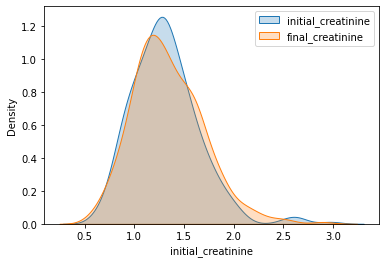

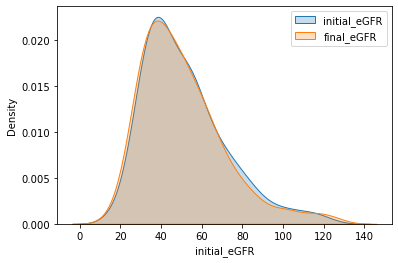

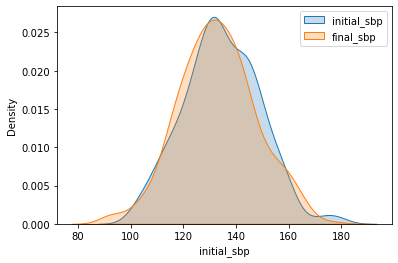

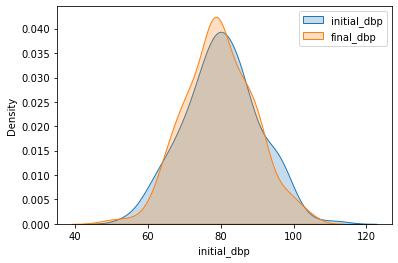

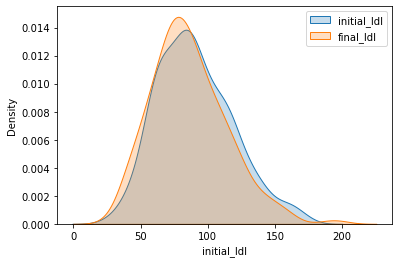

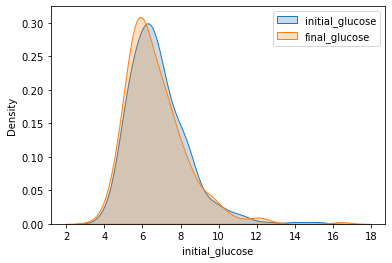

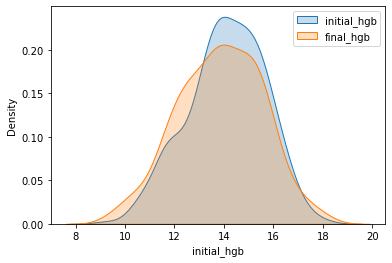

In [11]:
# first vs last reading
col_names = ['creatinine', 'eGFR', 'sbp', 'dbp', 'ldl', 'glucose', 'hgb']

for c in col_names:
    initial_c, final_c = f'initial_{c}', f'final_{c}'
    sns.kdeplot(data1[initial_c], shade=True, label=initial_c)
    sns.kdeplot(data2[final_c], shade=True, label=final_c)
    plt.legend()
    plt.show()

In [12]:
# Temporal differences
data1_subset = data1[['initial_creatinine', 'initial_eGFR', 'initial_sbp', 'initial_dbp',
                      'initial_ldl', 'initial_glucose', 'initial_hgb']]
data2_subset = data2[['final_creatinine', 'final_eGFR', 'final_sbp', 'final_dbp',
                      'final_ldl', 'final_glucose', 'final_hgb']]

In [13]:
temporal_data = pd.DataFrame(data1_subset.values - data2_subset.values)
temporal_data.columns = [f'{c}_diff' for c in col_names]
temporal_data['Stage_Progress'] = data1['Stage_Progress'].values
temporal_data.head()

,creatinine_diff,eGFR_diff,sbp_diff,dbp_diff,ldl_diff,glucose_diff,hgb_diff,Stage_Progress
0,0.06,-3.1,-13.39,11.03,3.59,0.46,0.38,True
1,-0.46,6.8,7.80,-18.50,16.33,0.18,1.04,False
2,0.31,-3.2,-3.57,-10.39,-25.52,0.20,0.15,True
3,-0.16,20.9,4.58,12.64,-1.71,0.66,1.08,False
4,0.41,-21.9,-37.67,-22.34,-6.30,-2.24,1.58,True


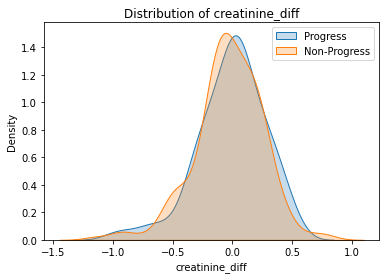

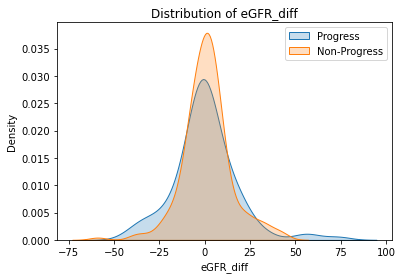

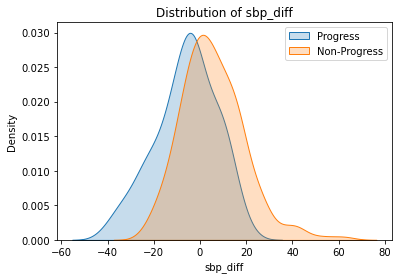

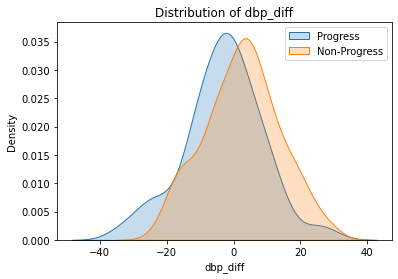

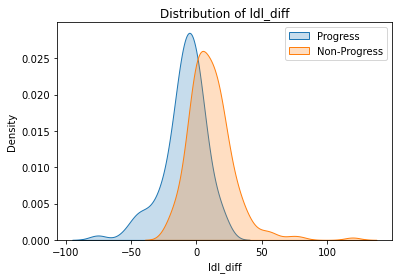

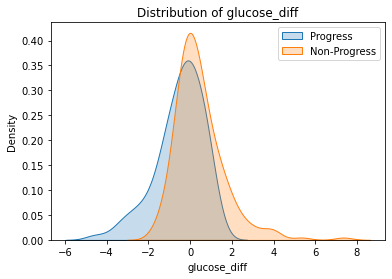

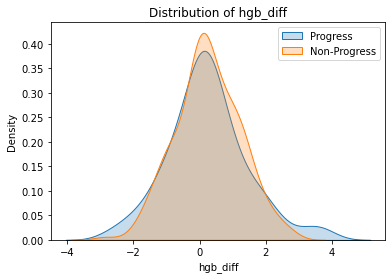

In [14]:
for c in temporal_data.drop('Stage_Progress', axis=1).columns:
    sns.kdeplot(temporal_data[temporal_data['Stage_Progress'] == True][c], shade=True, label='Progress')
    sns.kdeplot(temporal_data[temporal_data['Stage_Progress'] == False][c], shade=True, label='Non-Progress')
    plt.title(f'Distribution of {c}')
    plt.legend()
    plt.show()

In [15]:
col_names = ['stage', 'bp_stage', 'cholesterol_stage', 'diabetes_stage']

data1_subset = data1[[f'initial_{c}' for c in col_names]]
data2_subset = data2[[f'final_{c}' for c in col_names]]

In [16]:
change_stage = pd.DataFrame((data1_subset.values == data2_subset.values).astype('int'))
change_stage.columns = [f'{c}_change' for c in col_names]
change_stage['Stage_Progress'] = data1['Stage_Progress'].values
change_stage.head()

,stage_change,bp_stage_change,cholesterol_stage_change,diabetes_stage_change,Stage_Progress
0,1,1,0,0,True
1,1,1,1,1,False
2,1,1,1,1,True
3,0,0,0,0,False
4,0,0,1,1,True


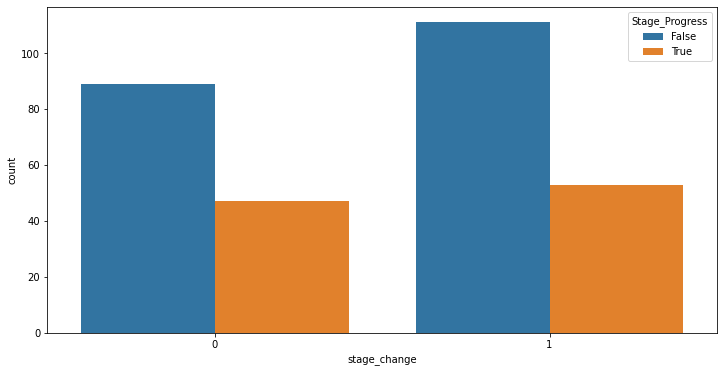

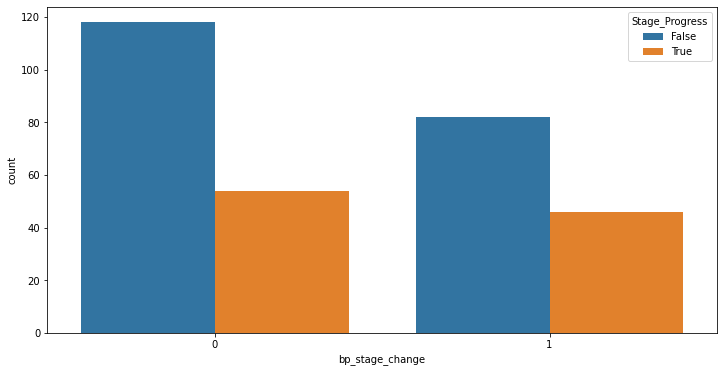

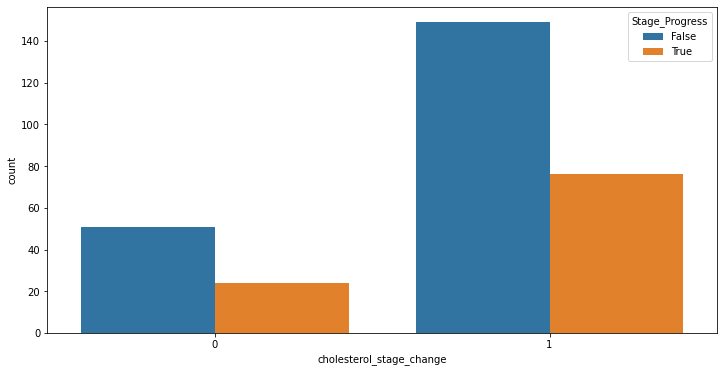

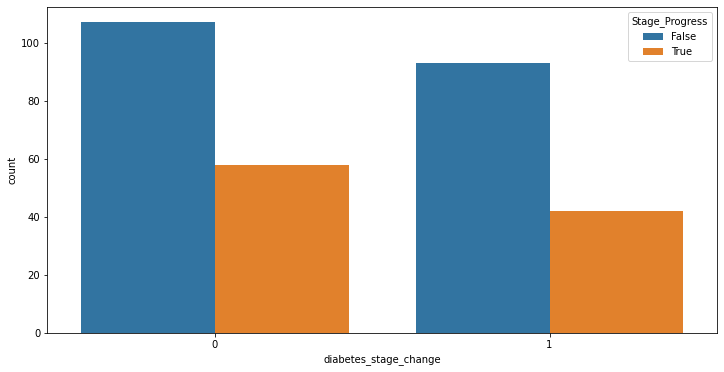

In [17]:
for c in change_stage.drop('Stage_Progress', axis=1).columns:
    plt.figure(figsize=(12,6))
    tmp = change_stage.groupby('Stage_Progress')[c].value_counts().rename('count').reset_index()
    sns.barplot(x=c, y='count', hue='Stage_Progress', data=tmp)
    plt.show()